In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create white noise
mu = 0
stdPhaseNoise = 1e-8
N = 10000
y = np.random.normal(mu, stdPhaseNoise, N)
frev = 43.45e3

In [3]:
def create_noise(N, colored=False):
    mu = 0
    stdPhaseNoise = 1e-8
    return  np.random.normal(mu, stdPhaseNoise, N)

In [9]:
# compute the psd
time = np.arange(N)/frev # convert from turns to time
Dt = time[1]-time[0] # sampling (s)
# freq = np.linspace(0, N/time[-1], N)  # [0, 2frev]
freq = np.fft.fftfreq(N, Dt) # [-frev/2, frev/2]
Df = freq[1]-freq[0]
print('sampling ratio Df={}'.format(Df))
   
#fft_list = []
#for i in range(1000):
#    y_noise = create_noise(N, False)
#    fft = np.fft.fft(y_noise)
#    fft_list.append(fft)

fft = np.fft.fft(y)
# keep the phase
phases = fft/np.abs(fft)

#mean_dft = np.mean(np.abs(fft_list)**2, axis=0)
PSD = np.abs(fft)**2/(Df*N**2) # power spectral density    

sampling ratio Df=4.345


In [5]:
np.abs(fft)

array([7.79475757e-07, 2.75602085e-07, 2.61284459e-07, ...,
       6.62432047e-07, 2.61284459e-07, 2.75602085e-07])

In [6]:
fft

array([ 7.79475757e-07+0.00000000e+00j, -4.80376902e-08+2.71383289e-07j,
       -5.53397197e-08+2.55356778e-07j, ...,
       -3.50387433e-07-5.62178676e-07j, -5.53397197e-08-2.55356778e-07j,
       -4.80376902e-08-2.71383289e-07j])

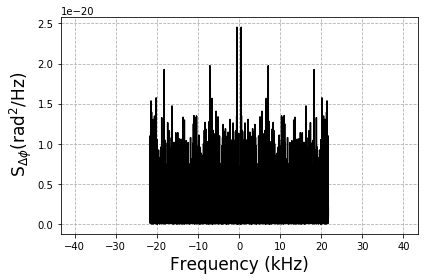

In [10]:
plt.plot(np.fft.fftshift(freq)/1000, np.fft.fftshift(PSD), c='k')
plt.xlabel('Frequency (kHz)', fontsize=17)
plt.ylabel(' S'+ r'$_{\Delta \phi}$'+ '(rad'+r'$^2$'+'/Hz)', fontsize=17)
plt.grid(linestyle='--')
#plt.ylim(1e-21, 4e-21)
plt.xlim(-43.45, 43.45)
plt.tight_layout()
#plt.savefig('PSD_rmsksi6e-2.png')

### 4. Go back to the time series

In [11]:
A = np.sqrt(PSD*(N**2)*Df)
# Give each spectral component a random phase, uniformly distributed between 0 and 2pi
# the maximum frequency,  Phi(f(k))
phi = np.exp(1j*2*np.pi*np.random.uniform(0,1,len(freq)))

In [27]:
fft_test = A*phases
print(fft_test)

[ 1.11477668e-06+0.00000000e+00j  8.24724320e-07+5.07778200e-07j
  5.72868895e-07+9.60912276e-08j ... -2.68519929e-07+1.25136256e-06j
  5.72868895e-07-9.60912276e-08j  8.24724320e-07-5.07778200e-07j]


In [29]:
print(np.fft.fftshift(fft))

[ 1.11477668e-06+0.00000000e+00j  3.56255166e-07-9.00605997e-07j
 -2.74216759e-08-5.80224394e-07j ... -9.19948454e-07-8.89778650e-07j
 -2.74216759e-08+5.80224394e-07j  3.56255166e-07+9.00605997e-07j]


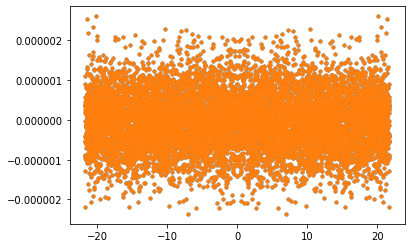

In [19]:
plt.plot(np.fft.fftshift(freq)/1000, np.fft.fftshift(fft) , '.')
plt.plot(np.fft.fftshift(freq)/1000,  np.fft.fftshift(fft_test), '.')

In [25]:
A =  np.fft.fftshift(fft)
B =  np.fft.fftshift(fft_test)
print(A)
print(B)

[ 1.11477668e-06+0.00000000e+00j  3.56255166e-07-9.00605997e-07j
 -2.74216759e-08-5.80224394e-07j ... -9.19948454e-07-8.89778650e-07j
 -2.74216759e-08+5.80224394e-07j  3.56255166e-07+9.00605997e-07j]
[ 7.79475757e-07+0.00000000e+00j  2.34686344e-07+1.44495083e-07j
  2.57684544e-07+4.32231953e-08j ... -1.38982277e-07+6.47688307e-07j
  2.57684544e-07-4.32231953e-08j  2.34686344e-07-1.44495083e-07j]


In [ ]:
np.array_equal(A,B)  

In [12]:
A

array([7.79475757e-07, 2.75602085e-07, 2.61284459e-07, ...,
       6.62432047e-07, 2.61284459e-07, 2.75602085e-07])

In [36]:
# Construct a frequency domain signal Z(f(k)) = A(f(k)) X e^(i X PHI(f(k))), this is the FFT of the noise spectrum
fft_y2 = A*phi

In [37]:
fft_y2

array([ 4.58693140e-07+7.54985558e-07j,  4.54677456e-07-5.55372762e-07j,
       -6.83762105e-07+1.82427800e-07j, ...,
       -9.07929589e-08+4.90936155e-07j,  1.60049974e-07+6.89343546e-07j,
        6.16012240e-07+3.68374016e-07j])

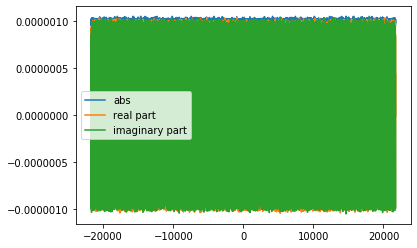

In [11]:
plt.plot(freq, np.abs(fft_y2), label='abs')
plt.plot(freq, fft_y2.real, label='real part')
plt.plot(freq, fft_y2.imag, label='imaginary part')
plt.legend()

In [12]:
# As close as we can get to the original signal
y2 = np.real(np.fft.ifft(fft_y2)) 

In [13]:
np.mean(y2)

-7.578615754804703e-12

In [14]:
np.std(y2)

7.0013888883227525e-09

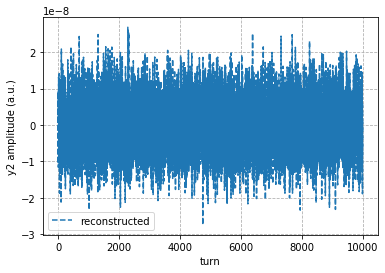

In [15]:
#plt.plot(y, label='original signal')
plt.plot(y2, label='reconstructed', linestyle='dashed')
plt.legend()
plt.xlabel('turn')
plt.ylabel('y2 amplitude (a.u.)')
plt.grid(True, linestyle='--')

In [34]:
# sanity check

In [16]:
# compute the psd, keep only the positive part of the spectrum
phaseerrorsfft1 = np.fft.fft(y2)
NN = len(y2)
phaseerrorsfft1_pos = phaseerrorsfft1#[:int(NN)//2]
phaseerrors_psd = np.abs(phaseerrorsfft1_pos)**2/((N**2)*Df)
#phaseerrors_psd = np.abs(phaseerrorsfft1_pos)**2*((N**2)*df)

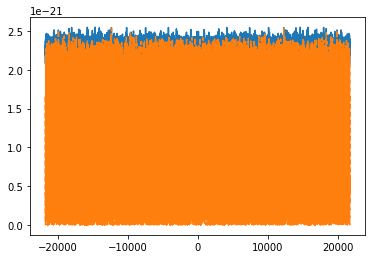

In [17]:
plt.plot(freq, PSD)
plt.plot(freq, phaseerrors_psd, '--')

In [37]:
len(y2) # array that contains the noise kicks

10000

In [38]:
type(y2)

numpy.ndarray

In [39]:
import pickle as pkl

with open('./output/PN_white_noise_2.pkl', 'wb') as f:
        pkl.dump(list(y2), f)

In [19]:
tt = pkl.load(open('./output/PN_white_noise.pkl', 'rb'))

In [20]:
np.mean(tt)

2.7384709212246194e-11

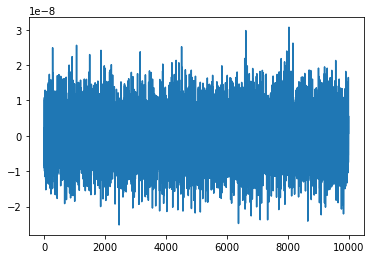

In [21]:
plt.plot(tt)

In [22]:
import pickle as pkl

with open('./output/PN_white_noise_initial.pkl', 'wb') as f:
        pkl.dump(list(y), f)